In [1]:
import numpy as np
import matplotlib.pyplot as plt

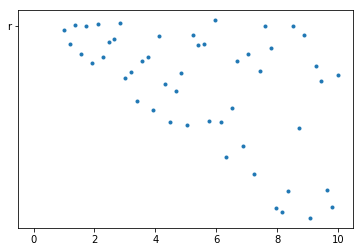

In [2]:
#随机生成样本
x = np.linspace(1,10)
k = -np.random.rand(50)*65.5 
kb = np.random.rand(50)*22.5 
y = x * k + kb

plt.plot(x,y,'.','r')

In [3]:
def Gred_Desc(gX,gy,gw,alpha=1):
    J0 = np.mean(gX * gw - gy)
    GD = alpha * J0 * gX.mean(0).T
    w1 = gw - GD
    J = np.linalg.norm(gX * w1 - gy)  
    return J,w1
def Gred_Desc_Loop(gX,gy,gw,alpha=1):
    J0 = np.mean(gX * gw - gy)
    GD = alpha * J0 * gX.mean(0).T
    w1 = gw - GD
    J = np.linalg.norm(gX * w1 - gy)  
    a = alpha
    print(np.abs(GD))
    if np.linalg.norm(GD)<1e-3:
        return J,w1
    else:
        Gred_Desc_Loop(gX,gy,w1,alpha=a)
def GD_Loop(gX,gy,gw,alpha=1):
    

In [4]:
m = len(x)    #样本数量
w0 = np.mat([0,0]).T
X = np.mat([x,np.ones(m)]).T
y1 = np.mat(y).T
J,w = Gred_Desc(X,y1,w0,alpha=1e-2)
List_J = []
#for i in range(1123):
#    J,w = Gred_Desc(X,y1,w,alpha=1e-2)
#    List_J.append(J)
#print(J,w.T)
J,w = Gred_Desc_Loop(X,y1,w,alpha=1e-2)

y_ = np.array(X * w)
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(x,y,'.','r')
ax1.plot(x,y_,'-','r')

#List = np.array(List_J).T
#ax2.plot(List)


[[6.20844918]
 [1.12880894]]
[[4.26830881]
 [0.77605615]]
[[2.93446231]
 [0.5335386 ]]
[[2.01744284]
 [0.36680779]]
[[1.38699195]
 [0.25218035]]
[[0.95355697]
 [0.17337399]]
[[0.65557041]
 [0.11919462]]
[[0.45070466]
 [0.0819463 ]]
[[0.30985945]
 [0.05633808]]
[[0.21302837]
 [0.03873243]]
[[0.14645701]
 [0.02662855]]
[[0.10068919]
 [0.01830713]]
[[0.06922382]
 [0.01258615]]
[[0.04759138]
 [0.00865298]]
[[0.03271907]
 [0.00594892]]
[[0.02249436]
 [0.00408988]]
[[0.01546487]
 [0.0028118 ]]
[[0.0106321 ]
 [0.00193311]]
[[0.00730957]
 [0.00132901]]
[[0.00502533]
 [0.0009137 ]]
[[0.00345491]
 [0.00062817]]
[[0.00237525]
 [0.00043186]]
[[0.00163299]
 [0.00029691]]
[[0.00112268]
 [0.00020412]]
[[0.00077184]
 [0.00014033]]


TypeError: cannot unpack non-iterable NoneType object

算法基本成功。
但是留下一个非常大的遗憾，即使算法对于w0初值的选取非常敏感。同时对于不同的数据集有不同的结果。
所以正式使用的线性回归+梯度下降必须要对初值有一个严格的估算！
感觉上，始终的梯度项GD是随着J的变化而变化的，但是因为样本本身就是随机的，所以J的值再小，也不会小到等于0，所以如果无限制的梯度下降，很容易就会把值做过了！
仔细分析后，发现J的算法有问题，把本来可以为负数的改成了范数。
现在算法可以了
